In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#put data into a variable
job_data = pd.read_csv(r'C:\Users\moder\Documents\Springboard\DATASETS\fake_job_postings.csv')

In [4]:
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
job_data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
job_data.shape

(17880, 18)

In [8]:
job_data.duplicated().value_counts()

False    17880
dtype: int64

In [9]:
job_data.isna().apply(pd.value_counts)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
False,17880.0,17880.0,17534,6333,2868,14572,17879,15185,10670,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0
True,NaN,NaN,346,11547,15012,3308,1,2695,7210,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN


In [10]:
job_data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
job_data["fraudulent"].unique()

array([0, 1], dtype=int64)

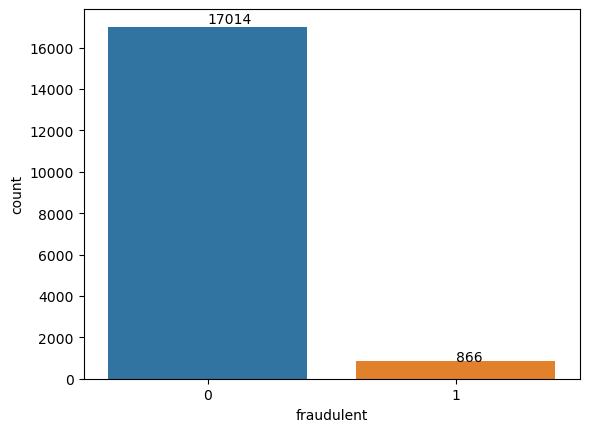

In [12]:
x = job_data.fraudulent.value_counts().index
y = job_data.fraudulent.value_counts().values

sns.countplot(x='fraudulent', data=job_data)

for i in x:
    plt.text(x=x[i], y=y[i]*1.01, s = y[i])

plt.show();

So, most of the jobs in this dataset are NOT fraudulent.

Create dataframe of FRAUDULENT jobs. What's going on with these?

In [13]:
fraudulent_df = job_data[job_data['fraudulent'] == 1]

In [14]:
fraudulent_df.isnull().sum()

job_id                   0
title                    0
location                19
department             531
salary_range           643
company_profile        587
description              1
requirements           154
benefits               364
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        241
required_experience    435
required_education     451
industry               275
function               337
fraudulent               0
dtype: int64

OK this has a lot of NULLS but since I'm just trying to get an idea of what's going on here, I'm going to ignore. I'm sure there are nulls because the job ads didn't include that information, which would be suspicious in the first place, so nulls aren't surprising.

In [15]:
fraudulent_df['location'].value_counts()[:10]

US, TX, Houston        92
AU, NSW, Sydney        31
US, ,                  28
US, CA, Bakersfield    24
US, CA, Los Angeles    23
US, CA, San Mateo      22
US, NY, New York       20
US, CA, San Jose       14
US, TX, AUSTIN         14
US, TX, DALLAS         12
Name: location, dtype: int64

Well that's interesting - what's going on with Houston, TX? Far and beyond all the other locations of fraudulent jobs.

<AxesSubplot:>

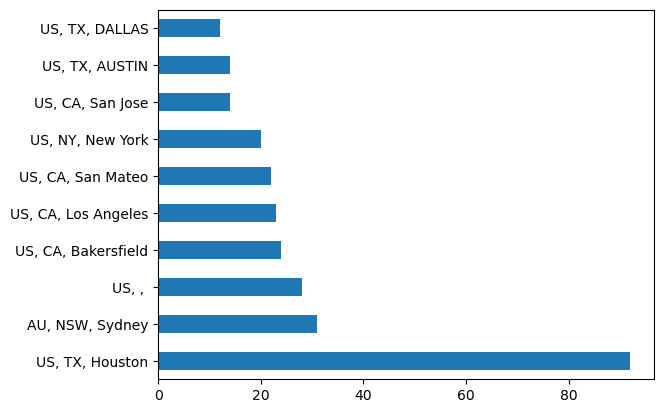

In [16]:
fraudulent_df['location'].value_counts()[:10].plot(kind='barh')

"Obviously there's a problem with the "US, , " value - will just ignore that.

In [17]:
fraudulent_df['department'].value_counts()

Engineering                                    46
Clerical                                       27
Oil & Energy                                   24
Information Technology                         15
Administrative                                 14
                                               ..
Administration                                  1
Commercial Management / Contract Management     1
Engineering - Construction                      1
Recruiting                                      1
Sales and Marketing                             1
Name: department, Length: 103, dtype: int64

Engineering is winning by a long stretch number of fraudulent job postings.

<AxesSubplot:>

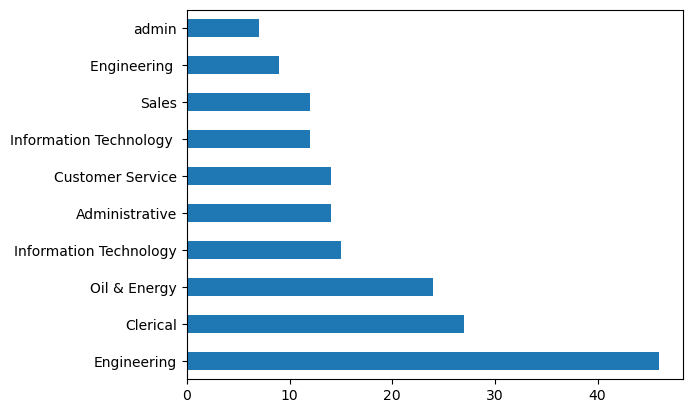

In [18]:
fraudulent_df['department'].value_counts()[:10].plot(kind='barh')

In [19]:
fraudulent_df['industry'].value_counts()

Oil & Energy                   109
Accounting                      57
Hospital & Health Care          51
Marketing and Advertising       45
Financial Services              35
                              ... 
Civic & Social Organization      1
Public Safety                    1
Wholesale                        1
Consumer Goods                   1
Online Media                     1
Name: industry, Length: 62, dtype: int64

And another clear winner - Oil and Energy by far has the most fraudulent postings of any industry.

<AxesSubplot:>

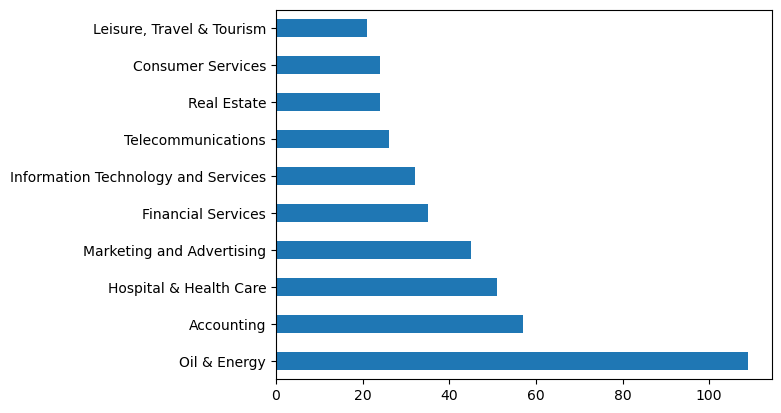

In [20]:
fraudulent_df['industry'].value_counts()[:10].plot(kind='barh')

In [21]:
fraudulent_df['employment_type'].value_counts()

Full-time    490
Part-time     74
Contract      44
Other         15
Temporary      2
Name: employment_type, dtype: int64

In [22]:
fraudulent_df['required_education'].value_counts()

High School or equivalent            170
Bachelor's Degree                    100
Unspecified                           61
Master's Degree                       31
Some High School Coursework           20
Certification                         19
Associate Degree                       6
Professional                           4
Some College Coursework Completed      3
Doctorate                              1
Name: required_education, dtype: int64

Now this is interesting, too - most of these fraudulent job ads require only a high school degree. That's not suprising considering that they are hoping to snag as many people as possible, and as many people without experience with the industry and job hunting as possible.

In [23]:
fraudulent_df['required_experience'].value_counts()

Entry level         179
Mid-Senior level    113
Not Applicable       60
Associate            42
Director             17
Executive            10
Internship           10
Name: required_experience, dtype: int64

Also not surprising but interesting to see in the data - they would want to make the jobs seem as easy to get and appealing as possible, so they list most of them as entry level.

<AxesSubplot:>

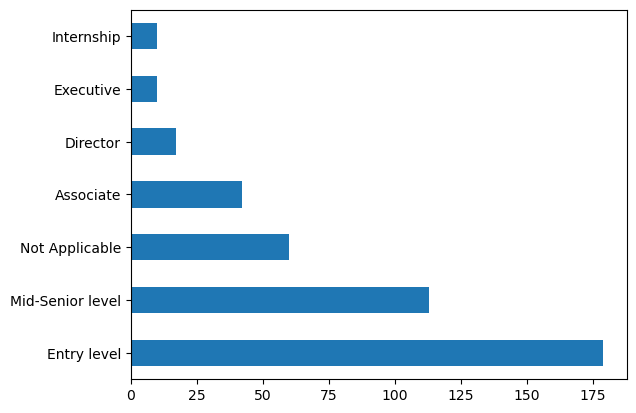

In [24]:
fraudulent_df['required_experience'].value_counts().plot(kind='barh')

In [25]:
fraudulent_df['function'].value_counts()

Administrative            119
Engineering               113
Customer Service           67
Sales                      41
Other                      32
Information Technology     32
Accounting/Auditing        29
Finance                    15
Business Development       13
Marketing                  10
Project Management         10
Human Resources             9
Management                  6
Financial Analyst           5
Advertising                 5
Consulting                  4
Data Analyst                4
Distribution                3
Design                      3
Manufacturing               2
Public Relations            1
Education                   1
Business Analyst            1
Strategy/Planning           1
General Business            1
Art/Creative                1
Health Care Provider        1
Name: function, dtype: int64

Similar to INDUSTRY but interesting to see ADMIN as the most common function in this fraudulent dataset.

<AxesSubplot:>

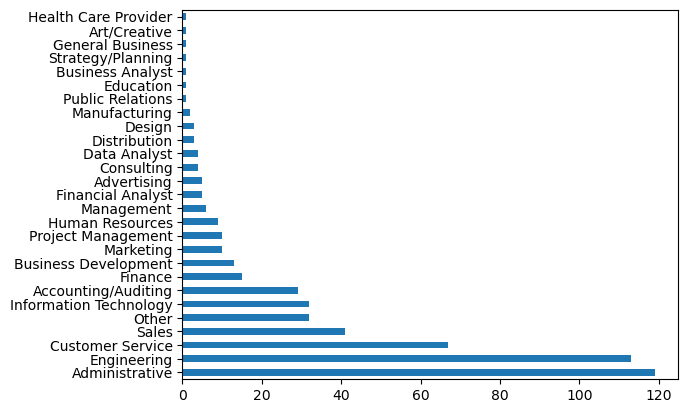

In [26]:
fraudulent_df['function'].value_counts().plot(kind='barh')

In [27]:
fraudulent_df['telecommuting'].value_counts()

0    802
1     64
Name: telecommuting, dtype: int64

This is interesting - I would have assumed more of the fraudulent ads offer telecommuting/remote work rather than onsite.

In [28]:
fraudulent_df['has_company_logo'].value_counts()

0    583
1    283
Name: has_company_logo, dtype: int64

Slightly more of the fraudulent ads lack company logos.

In [29]:
fraudulent_df.title.value_counts()[:20]

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Agency Sales Managers $150-$175,000/yr                                   9
 Payroll Data Entry Clerk Position - Earn $100-$200 Daily                6
Lawn and Maintenance Cont

<AxesSubplot:>

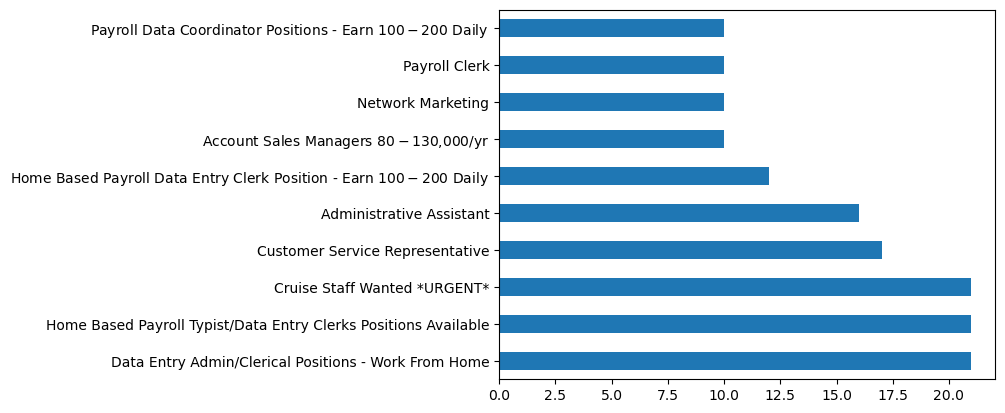

In [30]:
fraudulent_df.title.value_counts()[:10].plot(kind='barh')

Very recealing that the three most common fraudulent jobs titles are exactly the same - the same wording. 

Data Entry Admin/Clerical Positions - Work From Home                   
Home Based Payroll Typist/Data Entry Clerks Positions Available         
Cruise Staff Wanted *URGENT*

In contrast to the calculations for "telecommuting" two of these indicate "work from home" in the job title. Possible that there are errors or missing values.

I note that some of the most common job titles include mentions of pay in the titles themselves. I would say this is generally suspicious. 

In [31]:
fraudulent_df.salary_range.value_counts()

7200-1380000       10
30000-50000         8
250000-500000       7
28000-32000         6
35000-40000         6
                   ..
0-2000              1
34000-50000         1
2000-2000           1
6266624-8582080     1
0-30000             1
Name: salary_range, Length: 117, dtype: int64

This is bizarre - the most common salary range 7200-1380000 makes no sense! the rest are all over the place and seem very suspicious.

<AxesSubplot:>

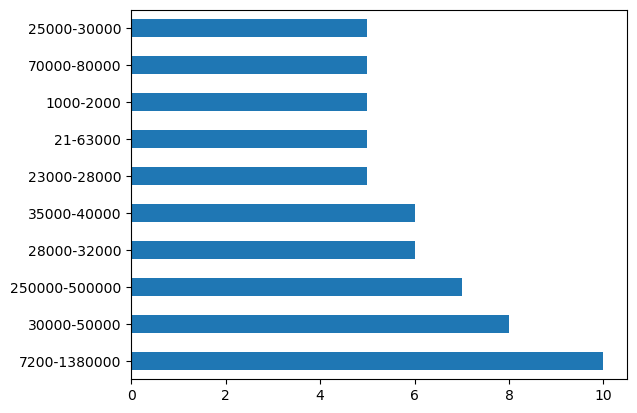

In [32]:
fraudulent_df.salary_range.value_counts()[:10].plot(kind='barh')

What about, of the fake ads, how many of a particular job title require entry level experience?

<AxesSubplot:>

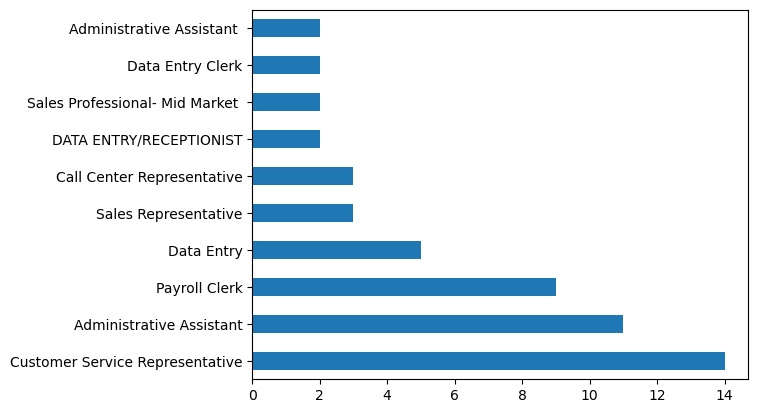

In [48]:
fraudulent_df.query("required_experience=='Entry level'")["title"].value_counts()[:10].plot(kind='barh')

Most of the fake entry level jobs have the title "Customer Service Representative"

Another scenario: looking at each instance where a common job title shows up, this one "Data Entry Admin/Clerical Positions - Work From Home" and see if there's any required experience.

In [42]:
fraudulent_df.query("title == 'Data Entry Admin/Clerical Positions - Work From Home'")["required_experience"]

1407     NaN
2209     NaN
2266     NaN
17524    NaN
17531    NaN
17574    NaN
17593    NaN
17595    NaN
17620    NaN
17660    NaN
17664    NaN
17669    NaN
17690    NaN
17695    NaN
17715    NaN
17718    NaN
17742    NaN
17765    NaN
17767    NaN
17791    NaN
17803    NaN
Name: required_experience, dtype: object

This is actually very revealing and why I didn't get rid of all the NaNs - having so much information missing from a job ad is a huge red flag. And here it shows that one of the most common fraudulent job titles has no work experience listed as requirement.

<AxesSubplot:>

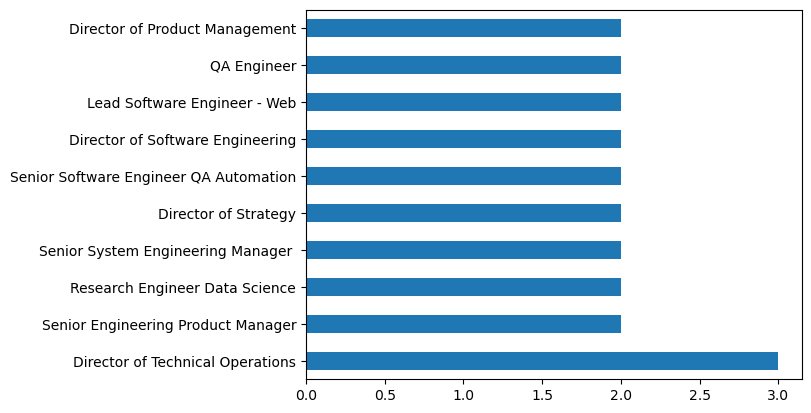

In [47]:
fraudulent_df.query("department == 'Engineering'")["title"].value_counts()[:10].plot(kind='barh')

In [36]:
fraudulent_df.query("department == 'Engineering'")["salary_range"]

573                NaN
606                NaN
661                NaN
2367               NaN
2407               NaN
2433               NaN
4344               NaN
4349               NaN
4350               NaN
4354               NaN
5472               NaN
5504               NaN
5672               NaN
6287               NaN
6412               NaN
6621               NaN
6773               NaN
6807               NaN
6879               NaN
6880               NaN
6881               NaN
6883               NaN
6967               NaN
7047               NaN
7344               NaN
8288               NaN
8477               NaN
9257               NaN
9356               NaN
9833               NaN
9834               NaN
9847               NaN
9968               NaN
10396              NaN
10961              NaN
11538              NaN
11541              NaN
11572              NaN
11753              NaN
11759              NaN
11768              NaN
11769    120000-180000
11770              NaN
14179      

Not that telling since most job ads as is don't list salary.

<AxesSubplot:>

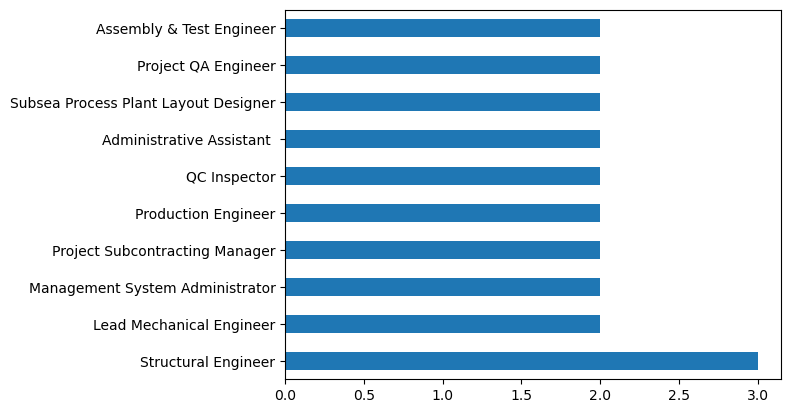

In [44]:
fraudulent_df.query("location == 'US, TX, Houston'")["title"].value_counts()[:10].plot(kind='barh')

The most common fake job title in Houston is Structural Engineer.

<AxesSubplot:>

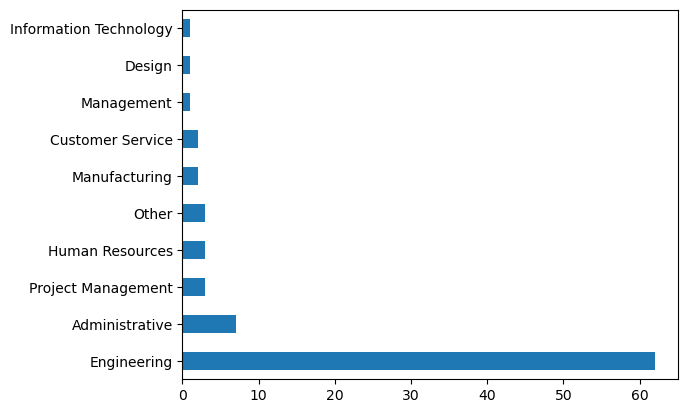

In [43]:
fraudulent_df.query("location == 'US, TX, Houston'")["function"].value_counts()[:10].plot(kind='barh')

The most common FUNCTION of fake jobs in Houston is Engineering.

<AxesSubplot:>

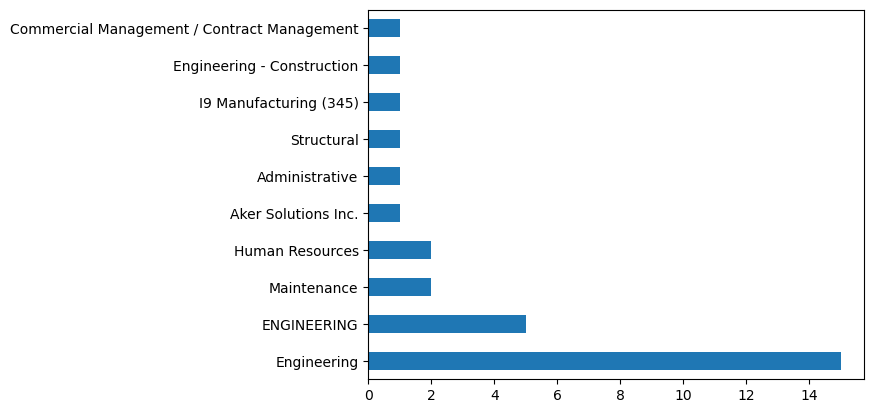

In [50]:
fraudulent_df.query("location == 'US, TX, Houston'")["department"].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

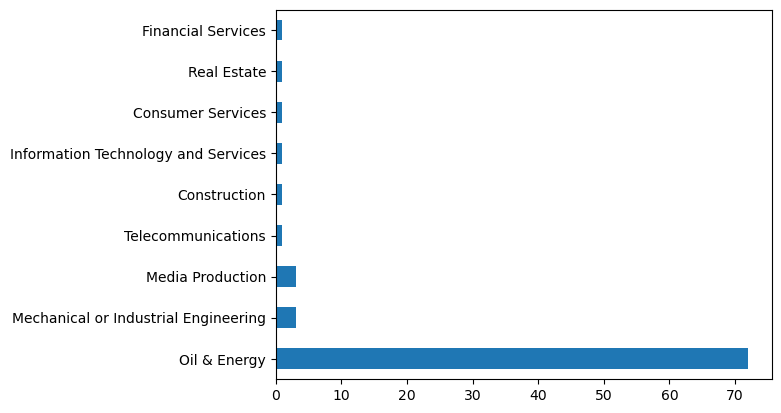

In [45]:
fraudulent_df.query("location == 'US, TX, Houston'")["industry"].value_counts()[:10].plot(kind='barh')

By far the most common industry listed in Houston fake ads is OIL AND ENERGY.

<AxesSubplot:>

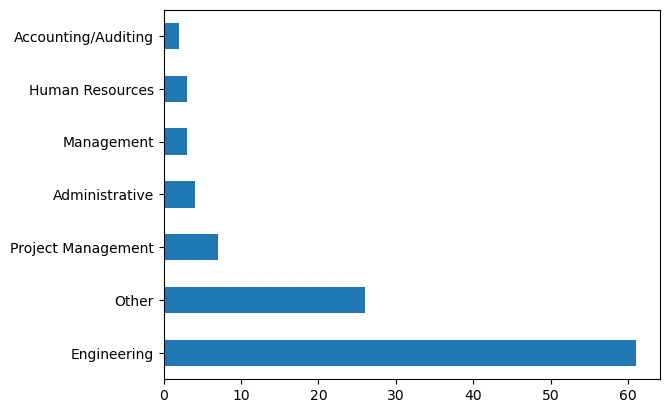

In [46]:
fraudulent_df.query("industry == 'Oil & Energy'")["function"].value_counts()[:10].plot(kind='barh')

And of OIL AND ENERGY, the most common "function" is Engineering.